In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

reading data + basic info:

In [2]:
df = pd.read_csv('../data/raw/sales_ads_train.csv')

print('dataframe shape: {}'.format(df.shape))
df.head()

dataframe shape: (135397, 25)


,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,...,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
0,1,13900,PLN,Used,Renault,Grand Espace,Gr 2.0T 16V Expression,NaN,2005.0,213000.0,...,Manual,minivan,5.0,blue,NaN,NaN,NaN,28/04/2021,"SŁONECZNA 1 - 99-300 Kutno, kutnowski, Łódzkie...","['ABS', 'Electric front windows', 'Drivers air..."
1,2,25900,PLN,Used,Renault,Megane,1.6 16V 110,III (2008-2016),2010.0,117089.0,...,Manual,station_wagon,5.0,silver,NaN,NaN,16/06/2010,04/05/2021,"ul. Wiosenna 8 - 41-407 Imielin, Centrum (Polska)","['ABS', 'Electric front windows', 'Drivers air..."
2,3,35900,PLN,Used,Opel,Zafira,Tourer 1.6 CDTI ecoFLEX Start/Stop,C (2011-2019),2015.0,115600.0,...,Manual,minivan,5.0,white,Denmark,NaN,NaN,03/05/2021,"Sianów, koszaliński, Zachodniopomorskie","['ABS', 'Electric front windows', 'Passengers ..."
3,4,5999,PLN,Used,Ford,Focus,1.6 TDCi FX Silver / Silver X,Mk2 (2004-2011),2007.0,218000.0,...,Manual,compact,5.0,blue,NaN,NaN,27/11/2007,02/05/2021,"Gdańsk, Pomorskie, Przymorze Wielkie","['ABS', 'Electric front windows', 'Drivers air..."
4,5,44800,PLN,Used,Toyota,Avensis,1.8,III (2009-),2013.0,NaN,...,Manual,NaN,4.0,other,Poland,Yes,20/05/2013,02/05/2021,"Świdnik, świdnicki, Lubelskie","['ABS', 'Electric front windows', 'Drivers air..."


finding data types, missing values (if any):

In [14]:
print(df["Stan"].value_counts())
print(df["Pierwszy_wlasciciel"].value_counts())

Stan
Used    3229
New       11
Name: count, dtype: int64
Pierwszy_wlasciciel
Yes    3240
Name: count, dtype: int64


Those columns have contradicting values, if the car is used then it can't be the first owner.

Let's check the unique values for each column:

In [13]:
cat_features = [
            "Waluta", "Stan", "Marka_pojazdu", "Model_pojazdu", "Wersja_pojazdu",
            "Generacja_pojazdu", "Rodzaj_paliwa", "Naped", "Skrzynia_biegow",
            "Typ_nadwozia", "Kolor", "Kraj_pochodzenia", "Lokalizacja_oferty", "Pierwszy_wlasciciel",
        ]

for col in cat_features:
    print(f"unique values for {col}:")
    print(len(df[col].unique()), df[col].unique())

unique values for Waluta:
2 ['PLN' 'EUR']
unique values for Stan:
2 ['Used' 'New']
unique values for Marka_pojazdu:
32 ['Škoda' 'Toyota' 'BMW' 'Volkswagen' 'Ford' 'Nissan' 'Fiat'
 'Mercedes-Benz' 'Volvo' 'Opel' 'Hyundai' 'Audi' 'Renault' 'Seat' 'Mazda'
 'Citroën' 'Porsche' 'Mitsubishi' 'Kia' 'Peugeot' 'Honda' 'Dacia' 'Suzuki'
 'Jaguar' 'Saab' 'Land Rover' 'Jeep' 'Smart' 'Lexus' 'Subaru' 'Lancia'
 'Chrysler']
unique values for Model_pojazdu:
183 ['Octavia' 'Avensis' 'Corolla' 'Superb' 'Seria 3' 'Passat' 'Transporter'
 'Golf' 'S-Max' 'Qashqai' 'Tipo' 'Fabia' 'X4' 'Kuga' 'Klasa E' 'XC 90'
 'Insignia' 'Fiesta' 'Seria 5' 'Sharan' 'Yaris' 'Corsa' 'I30' 'Q7' 'V40'
 'Combo' 'Meriva' 'Trafic' 'A6' 'Leon' 'Touran' 'Zafira' 'Galaxy' '6' 'A4'
 'CLS' 'Aygo' 'Klasa C' 'Focus' 'Auris' '3' 'Megane' 'A3' 'C4 Picasso'
 'Astra' 'Cayenne' 'C5' 'Vectra' 'Toledo' 'Mondeo' 'C3' 'Lancer' 'Sorento'
 'Bravo' '308' 'Ceed' 'Civic' 'Q5' 'Tiguan' 'Ibiza' 'Note' 'Clio' 'X1'
 'Logan' 'SX4' 'XF' 'Accord' 'S80' '9-3' '

In [3]:
print('info on data: {}'.format(df.info()))

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135397 entries, 0 to 135396
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          135397 non-null  int64  
 1   Cena                        135397 non-null  int64  
 2   Waluta                      132021 non-null  object 
 3   Stan                        132075 non-null  object 
 4   Marka_pojazdu               132046 non-null  object 
 5   Model_pojazdu               132088 non-null  object 
 6   Wersja_pojazdu              87336 non-null   object 
 7   Generacja_pojazdu           93737 non-null   object 
 8   Rok_produkcji               131990 non-null  float64
 9   Przebieg_km                 131394 non-null  float64
 10  Moc_KM                      131664 non-null  float64
 11  Pojemnosc_cm3               130711 non-null  float64
 12  Rodzaj_paliwa               131987 non-null  object 
 13  Emisja_CO2    

,ID,Cena,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Emisja_CO2,Liczba_drzwi
count,135397.000000,1.353970e+05,131990.000000,1.313940e+05,131664.000000,130711.000000,5.949700e+04,131033.000000
mean,67699.000000,6.306938e+04,2012.089901,1.531563e+05,151.716696,1881.811753,3.363019e+05,4.635611
std,39085.891536,8.807748e+04,7.003557,3.421378e+06,77.386471,727.605417,8.199407e+07,0.780062
min,1.000000,5.850000e+02,1923.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,33850.000000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,67699.000000,3.580000e+04,2013.000000,1.448635e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,101548.000000,7.599000e+04,2017.000000,2.060000e+05,173.000000,1997.000000,1.640000e+02,5.000000
max,135397.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


missing values analysis:

In [4]:
missing_values = df.isnull().sum()

print('missing values in each col: {}'.format(missing_values))

missing values in each col: ID                                0
Cena                              0
Waluta                         3376
Stan                           3322
Marka_pojazdu                  3351
Model_pojazdu                  3309
Wersja_pojazdu                48061
Generacja_pojazdu             41660
Rok_produkcji                  3407
Przebieg_km                    4003
Moc_KM                         3733
Pojemnosc_cm3                  4686
Rodzaj_paliwa                  3410
Emisja_CO2                    75900
Naped                         13054
Skrzynia_biegow                3775
Typ_nadwozia                   3359
Liczba_drzwi                   4364
Kolor                          3463
Kraj_pochodzenia              60420
Pierwszy_wlasciciel           94514
Data_pierwszej_rejestracji    80698
Data_publikacji_oferty         3449
Lokalizacja_oferty             3341
Wyposazenie                    3253
dtype: int64


basic visualizations:

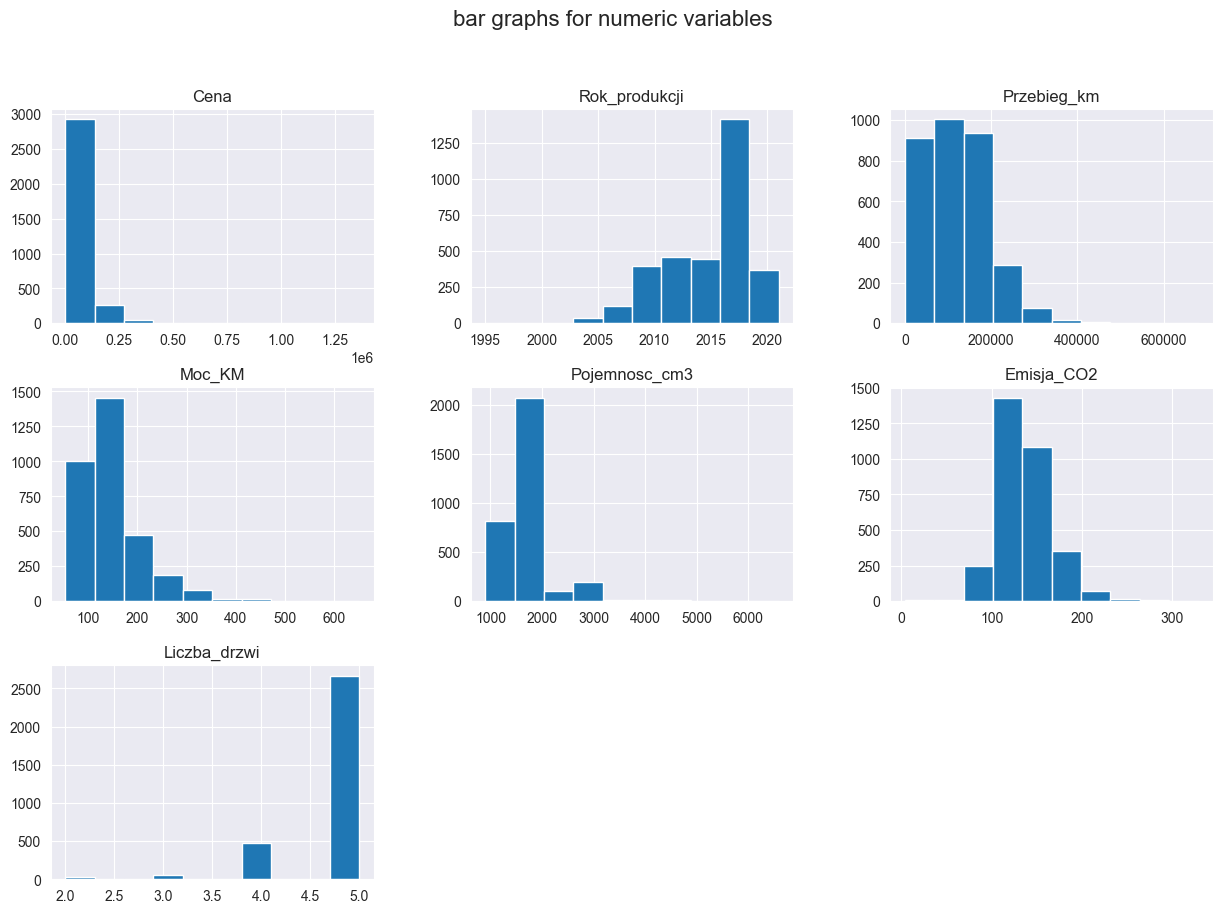

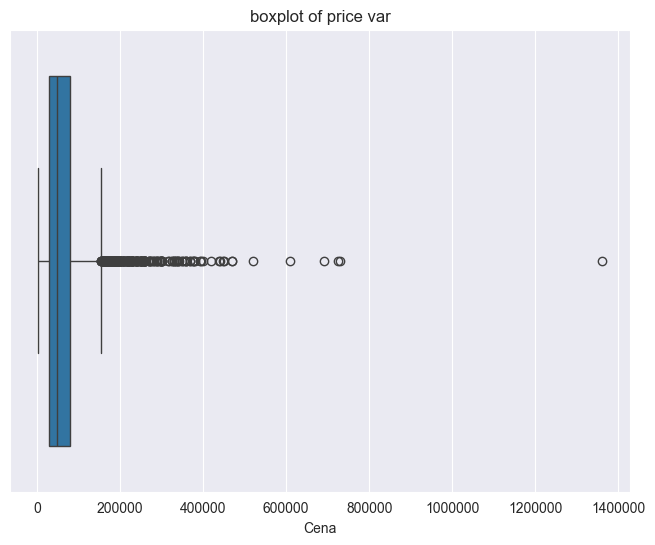

In [5]:
# cleaning missing values 
df = df.dropna()

df.drop('ID', axis=1).hist(figsize=(15, 10))
plt.suptitle("bar graphs for numeric variables", fontsize=16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# boxplot for 'price' outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Cena')
plt.title('boxplot of price var')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

['PLN', 'EUR']
Cena_PLN
49900.0     46
39900.0     43
29900.0     36
42900.0     30
59900.0     28
            ..
288000.0     1
24990.0      1
217095.0     1
43665.0      1
35916.0      1
Name: count, Length: 1152, dtype: int64


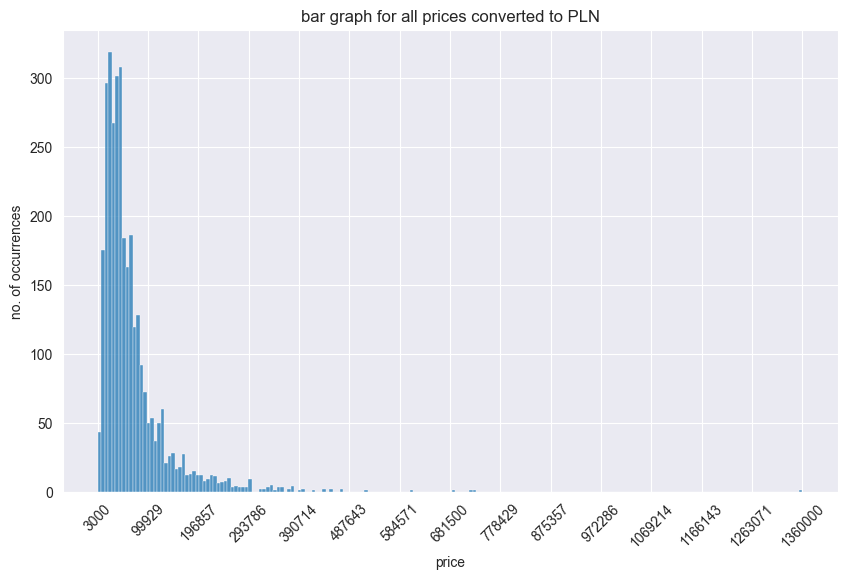

In [7]:
currencies = df['Waluta'].unique().tolist()
print(currencies)

conversion_rates = {'EUR': 4.18, 'PLN': 1.0}
df['Cena_PLN'] = df.apply(lambda row: round(row['Cena'] * conversion_rates.get(row['Waluta'], 1), 0), axis = 1)

print(df['Cena_PLN'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(df['Cena_PLN'])
plt.title('bar graph for all prices converted to PLN')
plt.xlabel('price')
plt.ylabel('no. of occurrences')

min = df['Cena_PLN'].min()
max = df['Cena_PLN'].max()

ticks = np.linspace(min, max, num=15)
plt.xticks(ticks, rotation=45)

plt.ticklabel_format(style='plain', axis='x')

plt.show()


correlation matrix for numeric variables:

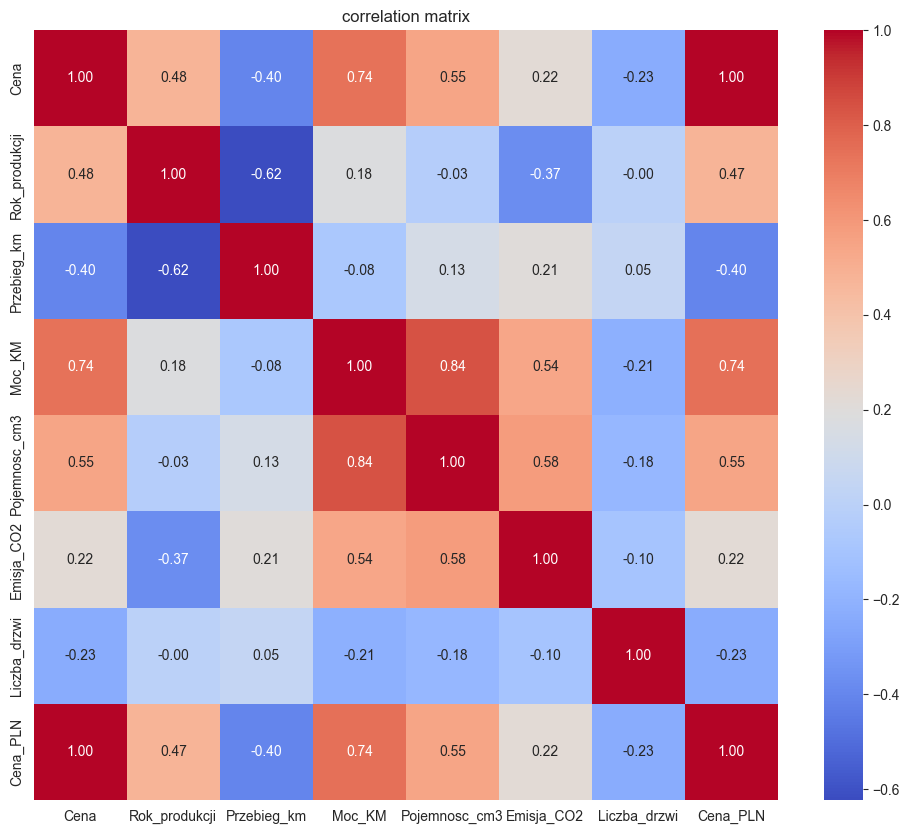

In [9]:
numeric_cols = df.select_dtypes(include=['number']).drop('ID', axis=1)
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("correlation matrix")
plt.show()

ads per date:

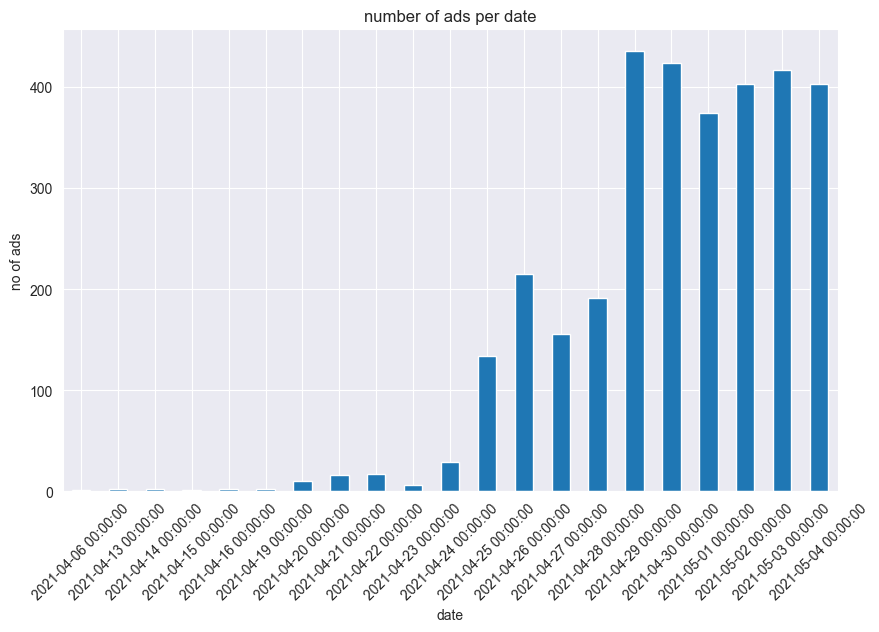

In [10]:
df['Data_pierwszej_rejestracji'] = pd.to_datetime(df['Data_pierwszej_rejestracji'], format="%d/%m/%Y", errors='coerce')
df['Data_publikacji_oferty'] = pd.to_datetime(df['Data_publikacji_oferty'], format="%d/%m/%Y", errors='coerce')

ads_sorted = df['Data_publikacji_oferty'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ads_sorted.plot(kind='bar')
plt.xlabel("date")
plt.ylabel("no of ads")
plt.title("number of ads per date")
plt.xticks(rotation=45)
plt.show()

analysis of correlation between price & other variables:

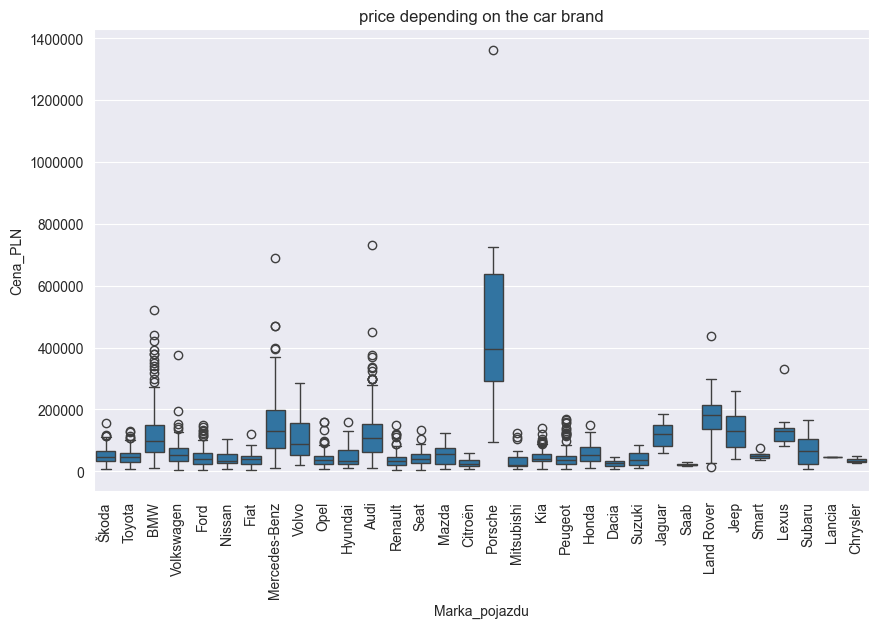

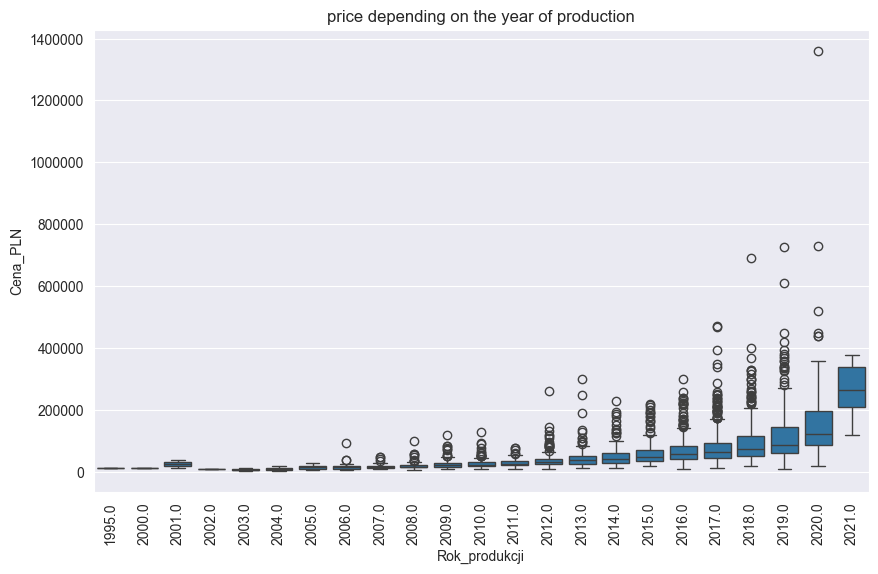

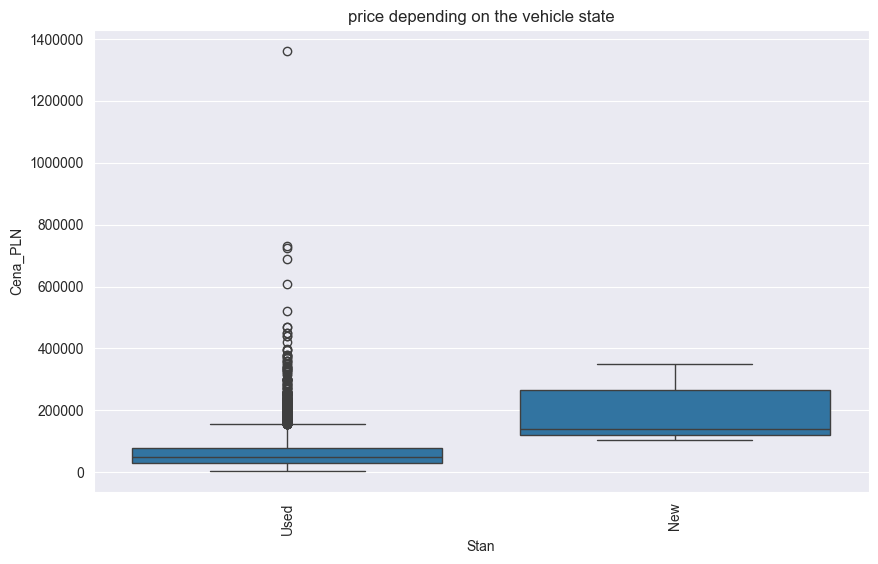

In [11]:
# car brand boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Marka_pojazdu', y='Cena_PLN')
plt.title('price depending on the car brand')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()


# prod year boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rok_produkcji', y='Cena_PLN')
plt.title('price depending on the year of production')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

# car state boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Stan', y='Cena_PLN')
plt.title('price depending on the vehicle state')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()


graph for average price by car brand:

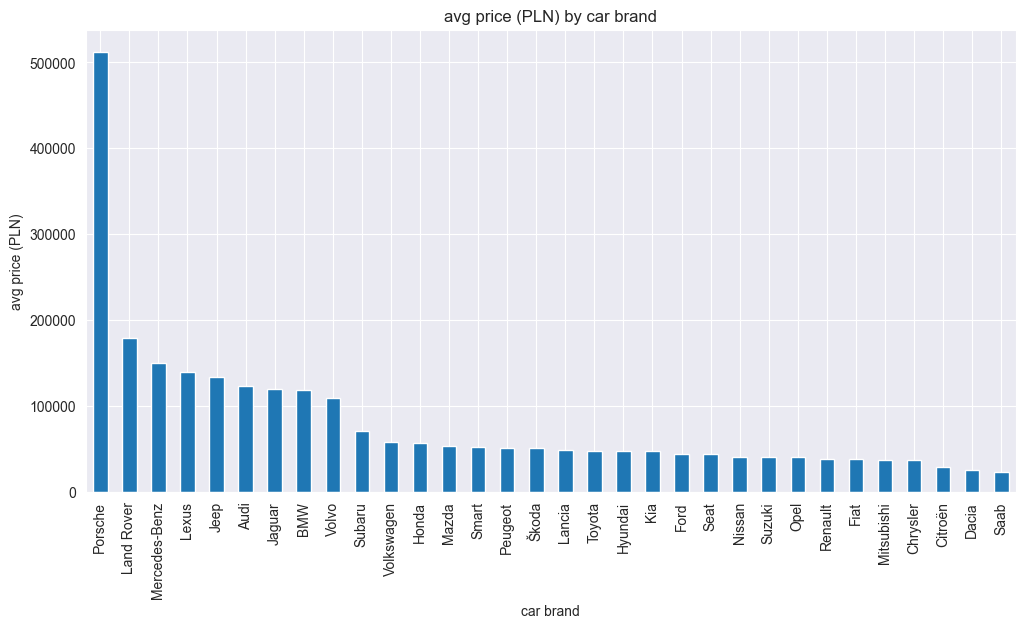

In [14]:
avg_price_by_brand = df.groupby('Marka_pojazdu')['Cena_PLN'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_price_by_brand.plot(kind='bar')
plt.xlabel("car brand")
plt.ylabel("avg price (PLN)")
plt.title("avg price (PLN) by car brand")
plt.xticks(rotation=90)
plt.show()

number of ads by location:

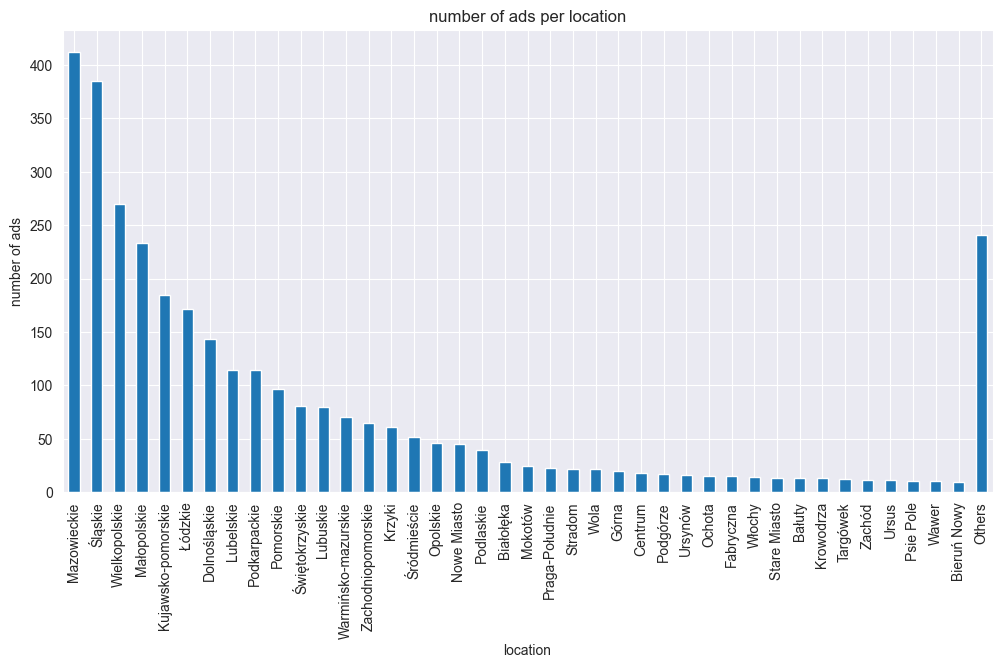

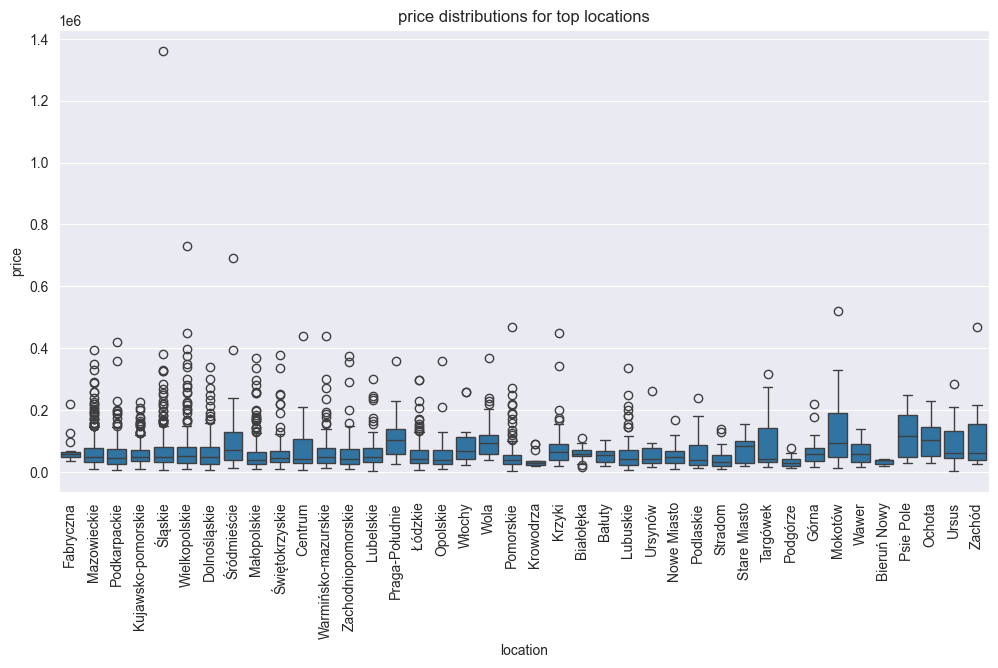

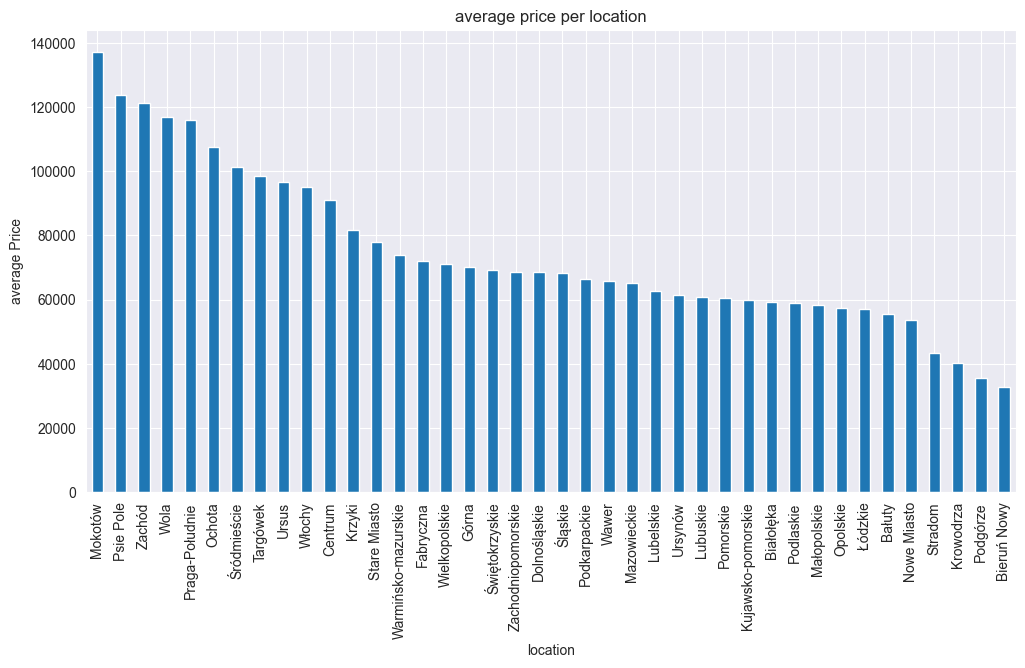

In [21]:
def extract_region_country(location):
    if pd.isnull(location):
        return None
    parts = location.split(',')
    result = parts[-1].strip() if parts else location
    result = result.replace("(Polska)", "").strip()
    return result

df['Region'] = df['Lokalizacja_oferty'].apply(extract_region_country)
ads_by_region = df['Region'].value_counts()

top_no = 40
top = ads_by_region.head(top_no).copy()
others = ads_by_region.iloc[top_no:].sum()
top["Others"] = others

plt.figure(figsize=(12,6))
top.plot(kind='bar')
plt.xlabel('location')
plt.ylabel('number of ads')
plt.title('number of ads per location')
plt.xticks(rotation=90)
plt.show()

# boxplot for price distribution in top locations
df_top = df[df['Region'].isin(top.index)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x='Region', y='Cena')
plt.title("price distributions for top locations")
plt.xlabel("location")
plt.ylabel("price")
plt.xticks(rotation=90)
plt.show()

# avg price per location
avg_prices = df_top.groupby('Region')['Cena'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_prices.plot(kind='bar')
plt.title("average price per location")
plt.xlabel("location")
plt.ylabel("average Price")
plt.xticks(rotation=90)
plt.show()


creating and saving number of ads per location as a map:

In [124]:
import folium
from geopy.geocoders import Nominatim
import time
import ssl
import certifi

context = ssl.create_default_context(cafile=certifi.where())
geolocator = Nominatim(user_agent="xyz (s27162@pjwstk.edu.pl)", ssl_context=context)


map_center = [52.237049, 21.017532]
m = folium.Map(location=map_center, zoom_start=6)

for region, count in ads_by_region.items():
    query = f"{region}, Polska"
    try:
        location = geolocator.geocode(query, timeout=10)
    except Exception as e:
        print(f"error while geocoding {region}: {e}")
        location = None
    if location:
        lat, lon = location.latitude, location.longitude
        radius = 5 + count / 50
        folium.CircleMarker(
            location=[lat, lon],
            radius=radius,
            popup=f"{region}: {count} ads",
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(m)
    else:
        print("no geocoding found for:", region)
    time.sleep(1) 
    
m.save("../reports/ads_map.html")


no geocoding found for: Chełm z dzielnicą Gdańsk Południe
no geocoding found for: Koźle-Zachód
no geocoding found for: Załęska Hałda-Brynów cz. Zach.
no geocoding found for: Stogi z Przeróbką


show map:

In [125]:
m

Let's now examine equipment frequency:

In [24]:
import ast

df['Wyposazenie_list'] = df['Wyposazenie'].apply(ast.literal_eval)

unique_values = set(item for sublist in df['Wyposazenie_list'] for item in sublist)

print("Unique Equipment Options:")
print(unique_values)

Unique Equipment Options:
{'Cruise control', 'Bluetooth', 'Lane assistant', 'Fog lights', 'Rain sensor', 'Active cruise control', 'Speed limiter', 'Passengers airbag', 'Front parking sensors', 'ESP(stabilization of the track)', 'GPS navigation', 'Electrochromic side mirrors', 'SD socket', 'Rear side airbags', 'Panoramic roof', 'AUX socket', 'Isofix', 'CD changer', 'Shift paddles', 'Alloy wheels', 'Electric front windows', 'ABS', 'Blind spot sensor', 'Manual air conditioning', 'Front side airbags', 'Heated rear seats', 'TV tuner', 'Heated front seats', 'Immobilizer', 'Parking assistant', 'Factory radio', 'MP3', 'HUD(head-up display)', 'Auxiliary heating', 'Hook', 'Heated windscreen', 'Velor upholstery', 'Electrically adjustable seats', 'Aftermarket radio', 'Electrochromic rear view mirror', 'CD', 'Power steering', 'LED lights', 'Xenon lights', 'USB socket', 'Four-zone air conditioning', 'Automatic air conditioning', 'Tinted windows', 'DVD player', 'Start-Stop system', 'Drivers airbag', 

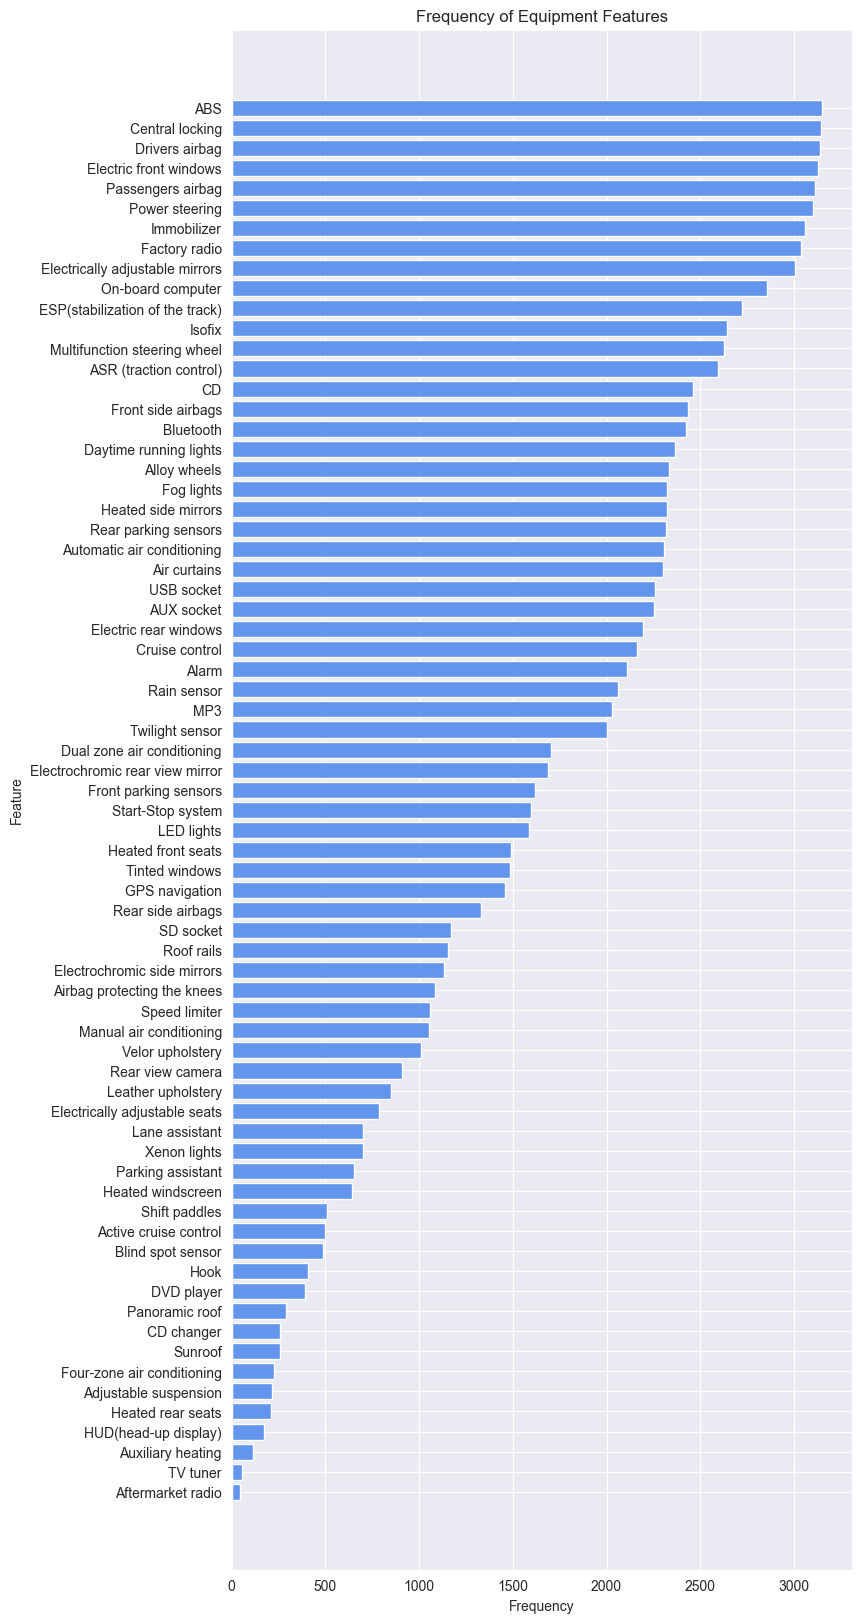

In [27]:
from collections import Counter

equipment_counts = Counter(item for sublist in df['Wyposazenie_list'] for item in sublist)

equipment_df = pd.DataFrame(equipment_counts.items(), columns=['Feature', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(8, 20))
plt.barh(equipment_df['Feature'], equipment_df['Count'], color='cornflowerblue')
plt.xlabel('Frequency')
plt.ylabel('Feature')
plt.title('Frequency of Equipment Features')
plt.gca().invert_yaxis()  
plt.show()

In [42]:
equipment_df['Percentage'] = equipment_df['Count'] / len(df) * 100
equipment_df

,Feature,Count,Percentage
0,ABS,3149,97.191358
11,Central locking,3143,97.006173
23,Drivers airbag,3136,96.790123
22,Electric front windows,3129,96.574074
2,Passengers airbag,3114,96.111111
...,...,...,...
64,Heated rear seats,209,6.450617
65,HUD(head-up display),173,5.339506
68,Auxiliary heating,113,3.487654
67,TV tuner,54,1.666667


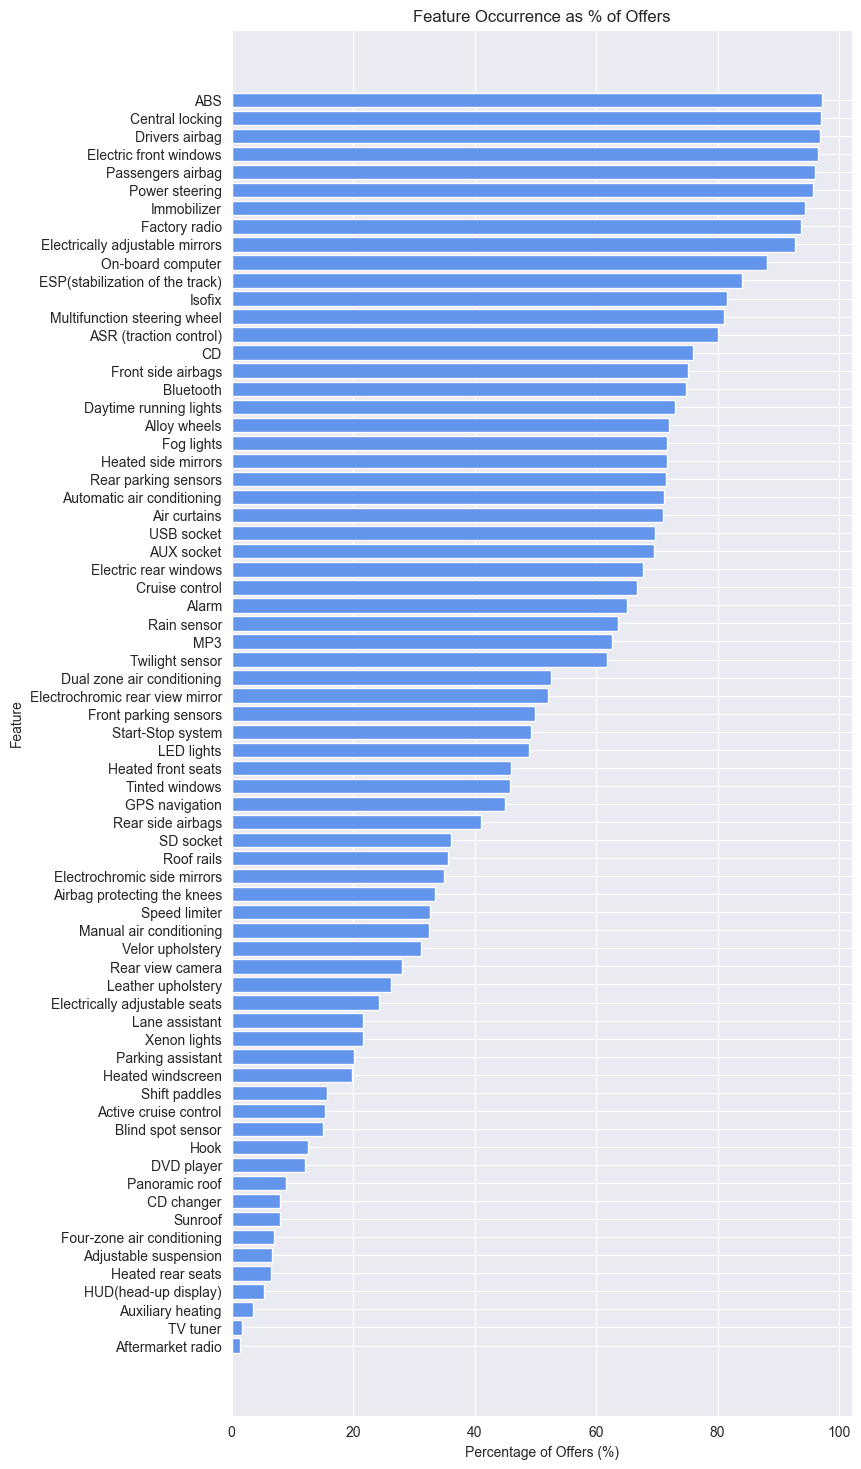

In [43]:
equipment_df = equipment_df.sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(8, 18))
plt.barh(equipment_df['Feature'], equipment_df['Percentage'], color='cornflowerblue')
plt.xlabel('Percentage of Offers (%)')
plt.ylabel('Feature')
plt.title('Feature Occurrence as % of Offers')
plt.gca().invert_yaxis()  # Invert y-axis to show the most common on top
plt.show()

There are some features that are common to almost all cars (ex.ABS, Central Locking, Airbac)

Let's define set of basic and rare features. To do this, let's first check the distribution of the price per each feature.

count       917.000000
mean     102854.304253
std       87684.896093
min        5800.000000
25%       41900.000000
50%       78900.000000
75%      133325.000000
max      729900.000000
Name: Cena_PLN, dtype: float64


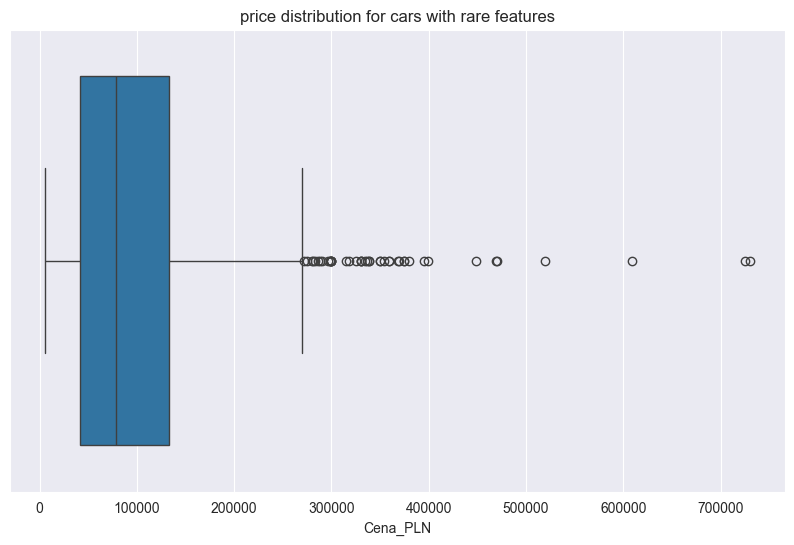

count      2323.000000
mean      54704.618597
std       52789.284281
min        3000.000000
25%       27999.000000
50%       43800.000000
75%       65752.500000
max     1360000.000000
Name: Cena_PLN, dtype: float64


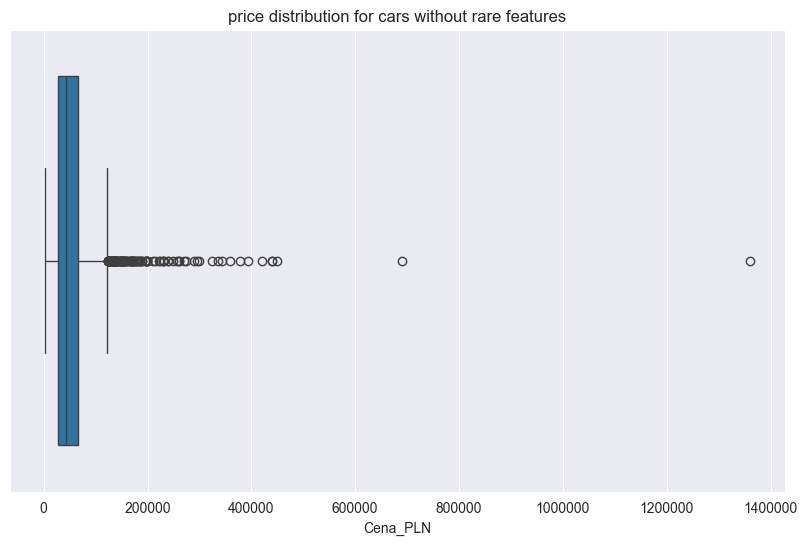

In [53]:
rare_features = equipment_df[equipment_df['Percentage'] < 10].Feature.to_list()

#price range for cars that have at least one rare feature
df_rare = df[df['Wyposazenie_list'].apply(lambda x: any(item in x for item in rare_features))]
print(df_rare['Cena_PLN'].describe())
# boxplot for price distribution in cars with rare features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_rare, x='Cena_PLN')
plt.title('price distribution for cars with rare features')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#price range for cars that don't have any rare feature
df_common = df[~df['Wyposazenie_list'].apply(lambda x: any(item in x for item in rare_features))]
with pd.option_context('display.float_format', '{:.6f}'.format):
    print(df_common['Cena_PLN'].describe())
    
# boxplot for price distribution in cars without rare features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_common, x='Cena_PLN')
plt.title('price distribution for cars without rare features')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

We can see that cars with rare features are on average more expensive than cars without them. There are some outliers in both cases. I.e. very expensive cars without rare features. However, the minimum price for cars with rare features is higher than the min price for cars without them.

In [58]:
all_features = equipment_df.Feature.to_list()

In [62]:
# print min price of a car for each feature
min_max_price_per_feature = []
for feature in all_features:
    print(feature)
    df_feature = df[df['Wyposazenie_list'].apply(lambda x: feature in x)]
    min_price = df_feature['Cena_PLN'].min()
    max_price = df_feature['Cena_PLN'].max()
    min_max_price_per_feature.append({"feature": feature, "min_price": min_price, "max_price": max_price})

ABS
Central locking
Drivers airbag
Electric front windows
Passengers airbag
Power steering
Immobilizer
Factory radio
Electrically adjustable mirrors
On-board computer
ESP(stabilization of the track)
Isofix
Multifunction steering wheel
ASR (traction control)
CD
Front side airbags
Bluetooth
Daytime running lights
Alloy wheels
Fog lights
Heated side mirrors
Rear parking sensors
Automatic air conditioning
Air curtains
USB socket
AUX socket
Electric rear windows
Cruise control
Alarm
Rain sensor
MP3
Twilight sensor
Dual zone air conditioning
Electrochromic rear view mirror
Front parking sensors
Start-Stop system
LED lights
Heated front seats
Tinted windows
GPS navigation
Rear side airbags
SD socket
Roof rails
Electrochromic side mirrors
Airbag protecting the knees
Speed limiter
Manual air conditioning
Velor upholstery
Rear view camera
Leather upholstery
Electrically adjustable seats
Lane assistant
Xenon lights
Parking assistant
Heated windscreen
Shift paddles
Active cruise control
Blind spot

In [76]:
min_max_price_per_ft_df = pd.DataFrame(min_max_price_per_feature)
min_max_price_per_ft_df

,feature,min_price,max_price
0,ABS,4300.0,729900.0
1,Central locking,3000.0,729900.0
2,Drivers airbag,3000.0,729900.0
3,Electric front windows,3000.0,729900.0
4,Passengers airbag,4300.0,729900.0
...,...,...,...
65,Heated rear seats,19900.0,729900.0
66,HUD(head-up display),16900.0,729900.0
67,Auxiliary heating,14900.0,729900.0
68,TV tuner,22400.0,729900.0


In [79]:
min_max_price_per_ft_df.max_price.describe()

count        70.000000
mean     690065.700000
std      106847.238749
min      229887.000000
25%      729900.000000
50%      729900.000000
75%      729900.000000
max      729900.000000
Name: max_price, dtype: float64

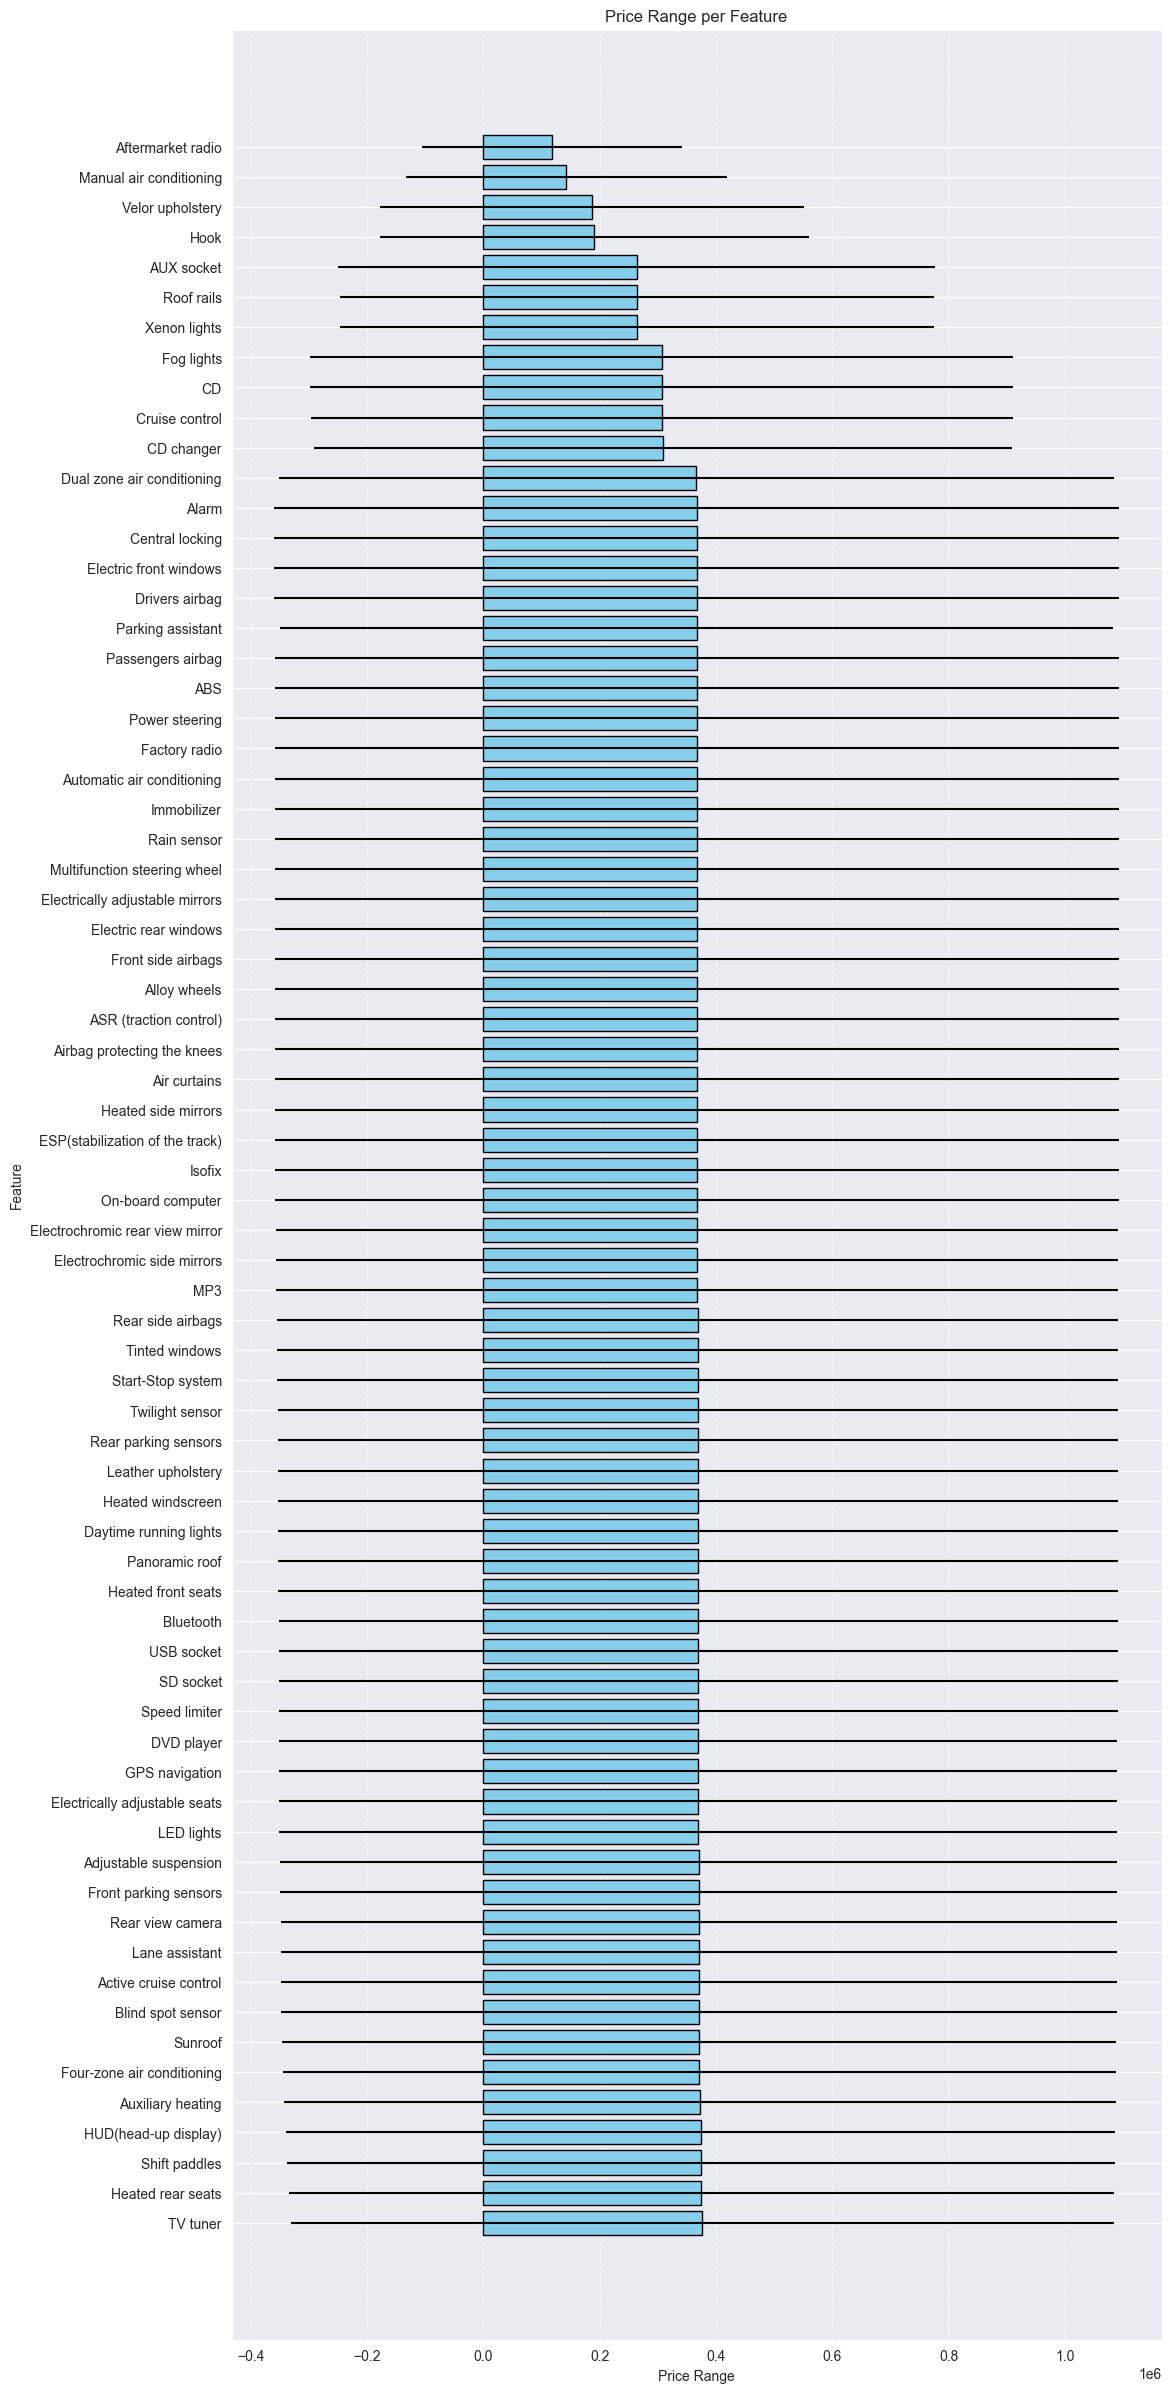

In [81]:
min_max_price_per_ft_df['MeanPrice'] = (min_max_price_per_ft_df['min_price'] + min_max_price_per_ft_df['max_price']) / 2
min_max_price_per_ft_df['Error'] = min_max_price_per_ft_df['max_price'] - min_max_price_per_ft_df['min_price']
min_max_price_per_ft_df = min_max_price_per_ft_df.sort_values('MeanPrice', ascending=False)

plt.figure(figsize=(12, 30))
plt.barh(min_max_price_per_ft_df['feature'], min_max_price_per_ft_df['MeanPrice'], xerr=min_max_price_per_ft_df['Error'], color='skyblue', edgecolor='black')
plt.xlabel('Price Range')
plt.ylabel('Feature')
plt.title('Price Range per Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [84]:
min_max_price_per_ft_df.feature.tail(11)

61                 CD changer
27             Cruise control
14                         CD
19                 Fog lights
52               Xenon lights
42                 Roof rails
25                 AUX socket
58                       Hook
47           Velor upholstery
46    Manual air conditioning
69          Aftermarket radio
Name: feature, dtype: object

Here we can see a list of features that are typically associated with higher prices. These features are usually found in more expensive cars. Those are features where price range is the lowest.

Let's check if the number of features in a car influences car price.

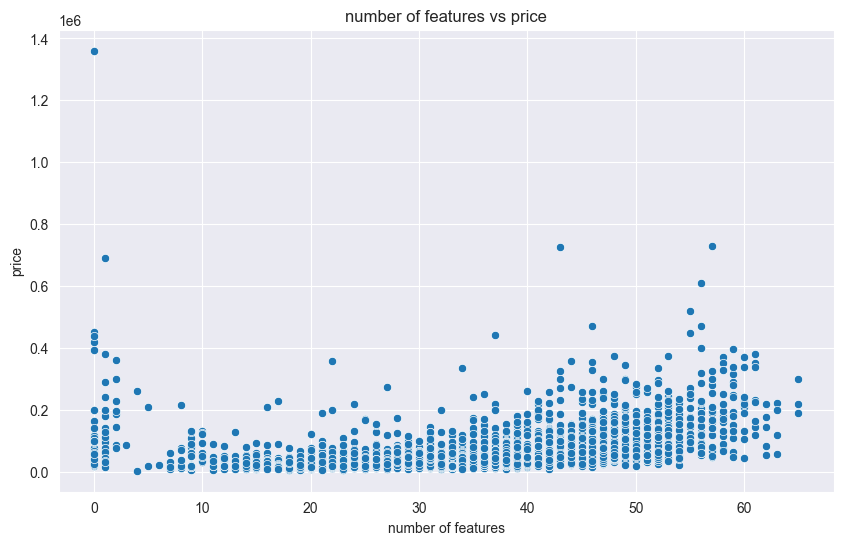

In [88]:
df["Wyposazenie_list_len"] = df["Wyposazenie_list"].apply(len)
# plot scatter number of features vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Wyposazenie_list_len', y='Cena_PLN')
plt.title('number of features vs price')
plt.xlabel('number of features')
plt.ylabel('price')
plt.show()


In [89]:
# is there a correlation between number of features and price?
corr = df['Wyposazenie_list_len'].corr(df['Cena_PLN'])
print(f"correlation between number of features and price: {corr} is weak")

correlation between number of features and price: 0.3473291127795192


It is not important how many features a car has, but which features it has. The number of features does not correlate with the price.